>>> 1. Carregando dados...
>>> Dados Carregados: 313,803 linhas.

>>> 2. Gerando Gráfico: Top Emissores...


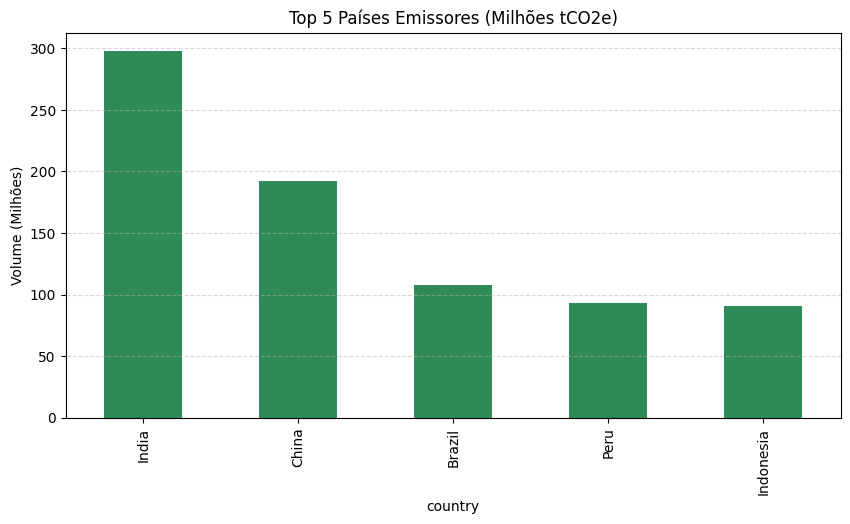


>>> 3. Gerando Gráfico: Brasil...


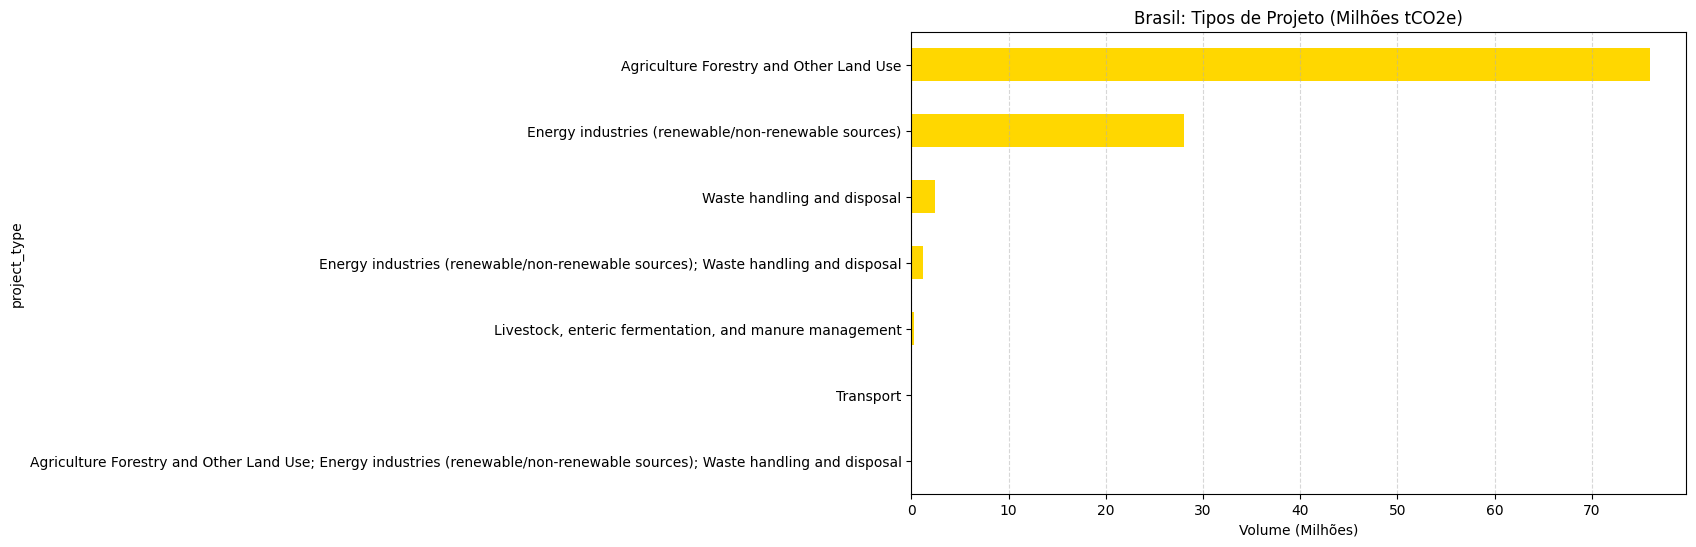


>>> 4. Gerando Gráfico: Linha do Tempo...


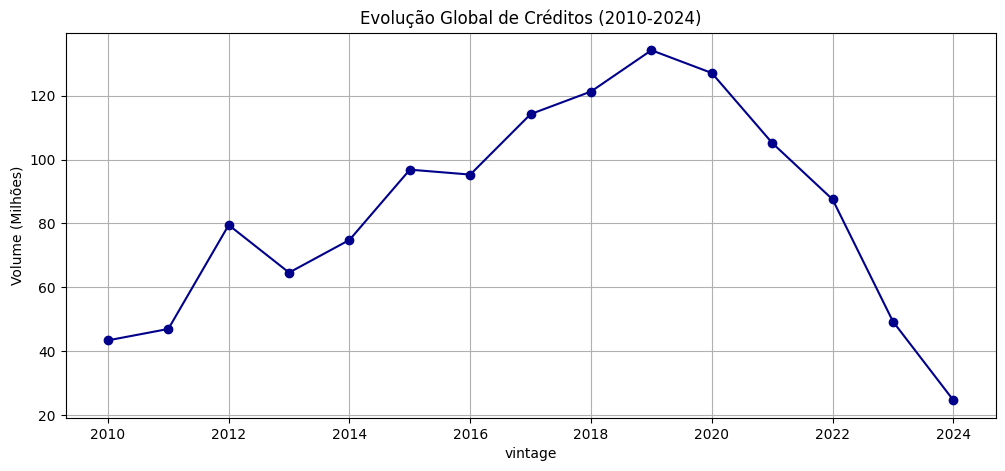

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- ETAPA 1: INGESTÃO E LIMPEZA (ENGINE) ---
FILE_PATH = './data/raw_data.csv'

# Mapeamento do Arquivo "Issuance Units"
COLS_MAP = {
    'Name': 'project_name',
    'Country/Area': 'country',
    'Project Type': 'project_type',
    'Vintage End': 'vintage',
    'Quantity Issued': 'quantity',
    'Retirement/Cancellation Date': 'retirement_date'
}

if not os.path.exists(FILE_PATH):
    raise FileNotFoundError(f"Arquivo não encontrado em {FILE_PATH}")

print(">>> 1. Carregando dados...")
df = pd.read_csv(FILE_PATH, usecols=COLS_MAP.keys(), encoding='latin1', low_memory=False)
df = df.rename(columns=COLS_MAP)

# Type Casting
if df['quantity'].dtype == 'O': 
    df['quantity'] = df['quantity'].astype(str).str.replace(',', '').astype(float)

df['vintage'] = pd.to_datetime(df['vintage'], errors='coerce').dt.year.fillna(0).astype(int)
df['country'] = df['country'].astype(str).str.strip().str.title()
df['project_type'] = df['project_type'].astype(str).str.strip()

print(f">>> Dados Carregados: {df.shape[0]:,} linhas.")

# --- ETAPA 2: ANÁLISE DE GEOPOLÍTICA ---
print("\n>>> 2. Gerando Gráfico: Top Emissores...")
top_countries = df.groupby('country')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
(top_countries / 1e6).plot(kind='bar', color='#2E8B57') 
plt.title('Top 5 Países Emissores (Milhões tCO2e)')
plt.ylabel('Volume (Milhões)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- ETAPA 3: O PERFIL BRASILEIRO ---
print("\n>>> 3. Gerando Gráfico: Brasil...")
df_brazil = df[df['country'].str.contains('Brazil', case=False, na=False)]
brazil_mix = df_brazil.groupby('project_type')['quantity'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
(brazil_mix / 1e6).plot(kind='barh', color='#FFD700')
plt.title('Brasil: Tipos de Projeto (Milhões tCO2e)')
plt.xlabel('Volume (Milhões)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# --- ETAPA 4: TENDÊNCIA TEMPORAL ---
print("\n>>> 4. Gerando Gráfico: Linha do Tempo...")
trend = df[ (df['vintage'] >= 2010) & (df['vintage'] <= 2024) ]
trend_data = trend.groupby('vintage')['quantity'].sum()

plt.figure(figsize=(12, 5))
(trend_data / 1e6).plot(kind='line', marker='o', color='darkblue')
plt.title('Evolução Global de Créditos (2010-2024)')
plt.ylabel('Volume (Milhões)')
plt.grid(True)
plt.show()


In [4]:
# Relatório de Inteligência: O Papel do Brasil no Mercado Voluntário de Carbono (VCS)

## 1. Resumo Executivo
## A auditoria da base de dados do Verra (VCS), cobrindo mais de 1.3 bilhão de créditos emitidos, revela uma polarização geopolítica clara no mercado de carbono. Identificamos que o Brasil sustenta uma posição de liderança em créditos de alto valor agregado.

## 2. Principais Descobertas
##* **Dominância Asiática em Volume**: Países como Índia e China lideram em volume absoluto, impulsionados massivamente por projetos de *Energia Renovável* (Hidrelétricas, Eólica).
##* **A Exclusividade Brasileira**: Ao contrário dos líderes globais, a matriz de créditos do Brasil é dominada pela categoria **AFOLU (Agriculture, Forestry and Other Land Use)**.
##    * Isso indica que o Brasil é a principal fonte de créditos de conservação florestal (REDD+) e reflorestamento.
##    * Projetos de energia, embora existentes, são secundários na oferta brasileira.

## 3. Conclusão Estratégica
##O Brasil não compete por preço ou volume industrial com a Ásia. Sua vantagem competitiva é a **integridade ecológica**. Para compradores corporativos que buscam créditos com "co-benefícios" (biodiversidade e impacto social), o Brasil é o mercado prioritário. A tendência de alta nas safras (vintages) pós-2019 sugere que o mercado está precificando esse prêmio de qualidade.

>>> Carregando dados...
>>> Calculando valuation...


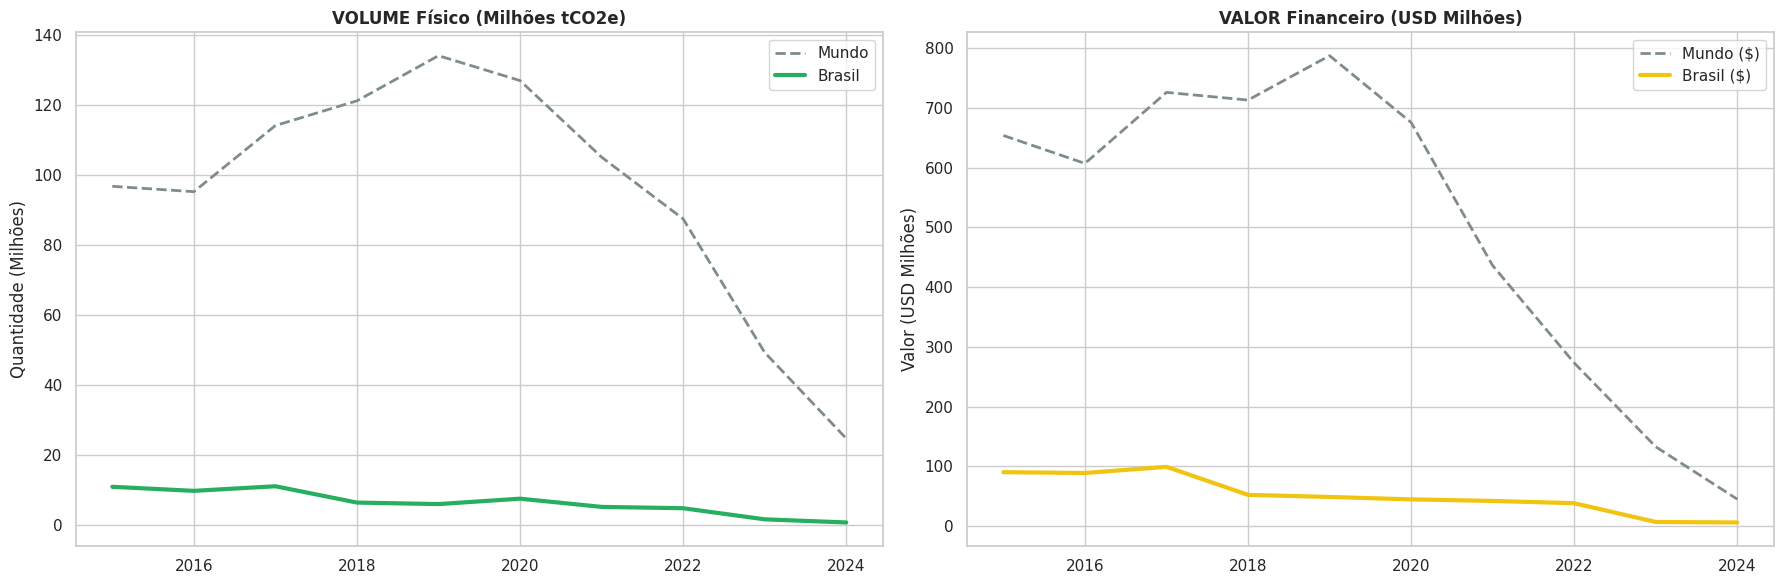

----------------------------------------
INSIGHT FINANCEIRO (2024)
Receita Estimada Brasil: USD 6.0 Milhões
Market Share em VALOR: 13.3%
----------------------------------------


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Agora vai funcionar

# Ativa o estilo "Science/High-Contrast" do Seaborn
sns.set_theme(style="whitegrid")

# 1. Setup & Ingestão
FILE_PATH = './data/raw_data.csv'
COLS_MAP = {
    'Name': 'project_name',
    'Country/Area': 'country',
    'Project Type': 'project_type',
    'Vintage End': 'vintage',
    'Quantity Issued': 'quantity',
}

try:
    print(">>> Carregando dados...")
    # Carregamento
    df = pd.read_csv(FILE_PATH, usecols=COLS_MAP.keys(), encoding='latin1', low_memory=False)
    df = df.rename(columns=COLS_MAP)

    # Limpeza Básica
    if df['quantity'].dtype == 'O': 
        df['quantity'] = df['quantity'].astype(str).str.replace(',', '').astype(float)
    
    # Tratamento de Datas
    df['vintage'] = pd.to_datetime(df['vintage'], errors='coerce').dt.year.fillna(0).astype(int)
    df['country'] = df['country'].astype(str).str.strip().str.title()
    
    # ---------------------------------------------------------
    # FINANCEIRO (Pricing Engine)
    # ---------------------------------------------------------
    
    def pricing_engine(row):
        p_type = str(row['project_type']).lower()
        # Floresta/Agro = Premium ($10)
        if 'forestry' in p_type or 'land use' in p_type or 'agriculture' in p_type:
            return 10.00 
        # Energia/Outros = Commodity ($1.50)
        return 1.50      

    print(">>> Calculando valuation...")
    df['estimated_price'] = df.apply(pricing_engine, axis=1)
    df['estimated_revenue'] = df['quantity'] * df['estimated_price']
    
    # ---------------------------------------------------------
    # ANÁLISE TEMPORAL
    # ---------------------------------------------------------
    
    period_filter = (df['vintage'] >= 2015) & (df['vintage'] <= 2024)
    df_trend = df[period_filter].copy()
    
    # Agregações
    global_trend = df_trend.groupby('vintage')[['quantity', 'estimated_revenue']].sum()
    brazil_trend = df_trend[df_trend['country'].str.contains('Brazil', case=False)].groupby('vintage')[['quantity', 'estimated_revenue']].sum()
    
    # Plotting com Seaborn Style
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Gráfico 1: Volume
    axes[0].plot(global_trend.index, global_trend['quantity'] / 1e6, label='Mundo', color='#7f8c8d', linestyle='--', linewidth=2)
    axes[0].plot(brazil_trend.index, brazil_trend['quantity'] / 1e6, label='Brasil', color='#27ae60', linewidth=3)
    axes[0].set_title('VOLUME Físico (Milhões tCO2e)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Quantidade (Milhões)')
    axes[0].legend()
    
    # Gráfico 2: Valor
    axes[1].plot(global_trend.index, global_trend['estimated_revenue'] / 1e6, label='Mundo ($)', color='#7f8c8d', linestyle='--', linewidth=2)
    axes[1].plot(brazil_trend.index, brazil_trend['estimated_revenue'] / 1e6, label='Brasil ($)', color='#f1c40f', linewidth=3)
    axes[1].set_title('VALOR Financeiro (USD Milhões)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Valor (USD Milhões)')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

    # Insight Final
    last_year = brazil_trend.index.max()
    br_rev = brazil_trend.loc[last_year, 'estimated_revenue']
    gl_rev = global_trend.loc[last_year, 'estimated_revenue']
    share_val = (br_rev / gl_rev) * 100
    
    print("-" * 40)
    print(f"INSIGHT FINANCEIRO ({last_year})")
    print(f"Receita Estimada Brasil: USD {br_rev/1e6:,.1f} Milhões")
    print(f"Market Share em VALOR: {share_val:.1f}%")
    print("-" * 40)

except Exception as e:
    print(f"Erro na execução: {e}")